![HeathCare_Analysis_Cover_Image](images/cover_images.jpeg)

# HEALTHCARE DATA ANALYSIS 

## 1.0 BUSINESS UNDERSTANDING

### PROBLEM STATEMENT
### OBJECTIVES



## 2.0 DATA UNDERSTANDING

Data was gotten from safra data

In [5]:
#Importing python libraries
import os
import pandas as pd
from classes import *
from datetime import datetime
from IPython.display import display, HTML

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


***
## 3.0 DATA PREPARATION
***
The following steps in summary shall be followed in the data preparation stages

**1. Data Loading**      
- Load the Dataset
         
- Inspect the Dataset
     
**2. Data Cleaning**
 
- Validity Check

- Consistency Check

- Uniformity Check

- Completeness Check

**3. Feature Engineering**

- Splitting insurer Column

- Splitting month columns

***
### 3.1 DATA LOADING
***
The following was carried out 
1. Loading the Datasets
         
2. Inspecting the Data

In [8]:
# Instantiate the DataLoader class
loader= DataLoader()

# Reading the csv file
df=loader.read_data("Healthcare Dataset.xlsx").set_index('_index')

# Instantiate the DataInfo class
summary= DataInfo()

# Summary view of the dataset information
summary.info(df)

# setting to view all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Shape of the dataset : (6158, 31) 

Column Names
Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'How many children do you have, if any?',
       'Employment Status', 'Monthly Household Income',
       'Have you ever had health insurance?', 'If yes, which insurance cover?',
       'When was the last time you visited a hospital for medical treatment? (In Months)',
       'Did you have health insurance during your last hospital visit?',
       'Have you ever had a routine check-up with a doctor or healthcare provider?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
       'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?',

,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,"How many children do you have, if any?",When was the last time you visited a hospital for medical treatment? (In Months),Your Picture,Your Picture_URL,_id,_submission_time,_validation_status,_notes,_tags
count,5805.000000,5805.000000,5805.000000,5805.000000,6010,5533.000000,6000.000000,0.0,0.0,6.158000e+03,6158,0.0,0.0,0.0
mean,-0.737841,36.715208,1536.439555,71.217272,2023-06-23 12:19:03.484193280,147.165371,6.651875,NaN,NaN,2.482603e+08,2023-06-25 04:21:26.056349440,NaN,NaN,NaN
min,-4.051936,34.092111,-201.295000,0.000000,2023-05-15 08:35:00,0.000000,0.000000,NaN,NaN,2.301624e+08,2023-04-05 08:44:06,NaN,NaN,NaN
25%,-1.259315,36.379644,1348.900024,4.100000,2023-06-16 10:18:30,1.000000,2.000000,NaN,NaN,2.469582e+08,2023-06-19 10:27:25.750000128,NaN,NaN,NaN
50%,-0.726425,36.866007,1592.900024,4.820000,2023-06-23 10:22:00,2.000000,4.000000,NaN,NaN,2.486249e+08,2023-06-26 09:56:12.500000,NaN,NaN,NaN
75%,-0.378057,37.146309,1857.600000,7.196000,2023-06-30 15:33:30,3.000000,8.000000,NaN,NaN,2.499817e+08,2023-07-03 13:40:47,NaN,NaN,NaN
max,1.842157,39.692109,2988.477000,4900.000000,2023-07-27 12:00:00,800159.000000,2021.000000,NaN,NaN,2.584794e+08,2023-08-07 09:12:14,NaN,NaN,NaN
std,0.870519,0.866878,494.157138,388.100302,NaN,10757.084650,37.295530,NaN,NaN,2.565886e+06,NaN,NaN,NaN,NaN


Dataset Overview


,Location,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",Your Picture,Your Picture_URL,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.2742007 36.058336 1882.2000732421875 20.0,-0.274201,36.058336,1882.200073,20.0,NaT,41-50,Female,Married,2.0,Self-employed,20001-30000,Yes,Nhif,53.0,No,Yes,2,No,2,NaN,NaN,230162389,aa30304f-84f2-4c1b-b30a-371241f2ff17,2023-04-05 08:44:06,NaN,NaN,submitted_via_web,NaN,vJ8gEKnN2pccxThc5jnkz4,NaN
2,-0.7158125 37.1475058 1361.9000244140625 20.0,-0.715812,37.147506,1361.900024,20.0,2023-05-15 13:38:00,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NaN,8.0,No,Yes,1,No,NaN,NaN,NaN,238299334,63c461e3-b3ef-47cf-9632-0c912a639f46,2023-05-15 10:44:01,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
3,-0.7158157 37.1475082 1361.9000244140625 20.0,-0.715816,37.147508,1361.900024,20.0,2023-05-15 13:49:00,41-50,Female,Married,5.0,Self-employed,20001-30000,No,Nhif,6.0,Yes,No,NaN,Yes,4+,NaN,NaN,238301092,4209a55d-a983-433f-8ce0-bce6cd28d713,2023-05-15 10:51:08,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
4,-0.7157082 37.14749 1361.9000244140625 20.0,-0.715708,37.147490,1361.900024,20.0,2023-05-15 14:19:00,18-30,Male,Single,NaN,Self-employed,10001-20000,Yes,Nhif,16.0,Yes,No,NaN,No,NaN,NaN,NaN,238311207,2eba9b13-1706-4faf-b7a7-e45e9dcf48ab,2023-05-15 11:22:19,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
5,-0.7157337 37.1474799 1361.9000244140625 20.0,-0.715734,37.147480,1361.900024,20.0,2023-05-15 14:30:00,41-50,Male,Married,7.0,Self-employed,20001-30000,Yes,Nhif,13.0,Yes,No,NaN,Yes,4+,NaN,NaN,238314477,1f49cb82-75ff-4391-b69b-973a6ce698ee,2023-05-15 11:33:21,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN


**Observation**
***

- Dataset has 6158 rows and 31 columns
- There are multiple missing values in most columns
- Column labeling needs to be reconsidered


***
### 3.2 DATA CLEANING
*** 
- Uniformity Check
  
- Validity Check

- Consistency Check

- Completeness Check
  


***
#### 3.2.1 UNIFORMITY CHECK
***
- Renaming Columns
- Cleaning Column names

In [12]:
# Renaming of columns using mapping
mapping={
    "How many children do you have, if any?":"no_of_children",
    "Have you ever had health insurance?": "had_health_insurance?",
    "If yes, which insurance cover?":"insurer",
    "When was the last time you visited a hospital for medical treatment? (In Months) ":"last_visit",
    "Did you have health insurance during your last hospital visit?":"had_health_insurance_during_visit?",
    "Have you ever had a routine check-up with a doctor or healthcare provider?":"had_routine_checkup_with_doctor",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?":"years_since_last_checkup",
    "Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?":"had_cancer_screening?",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?":"years_since_last_cancer_screening",
    "When was the last time you visited a hospital for medical treatment? (In Months)":"months_since_last_hospital_visit",
    "_Location_latitude":"location_latitude",
    "_Location_longitude":"location_longitude",
    "_Location_altitude":"location_altitude",
    "_Location_precision":"Location_precision",
    "_submission_time":"submission_time"

}

# Performing column replaement
df.rename(columns=mapping, inplace= True)

In [13]:
# ensuring all column names are all lower case
df.columns=df.columns.str.lower()

# ensuring all column names have the spaces between words replaced by _
df.columns=df.columns.str.replace(" ","_")

# viewing the general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5805 non-null   object        
 1   location_latitude                   5805 non-null   float64       
 2   location_longitude                  5805 non-null   float64       
 3   location_altitude                   5805 non-null   float64       
 4   location_precision                  5805 non-null   float64       
 5   date_and_time                       6010 non-null   datetime64[ns]
 6   age                                 6140 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6140 non-null   object        
 9   no_of_children                      5533 non-null   float64       
 10  employment_status            

***
#### 3.2.2 CONSISTENCY CHECK
***
- Duplicated rows
- Cross-Field Consistency
- Data Validation


In [15]:
# check for duplicated rows
df.duplicated().sum()

0

In [16]:
# Ensuring all entries in the insurer column are standardized
df['insurer'] = df['insurer'].str.strip().str.upper()


In [17]:
# Assumption 1:
df.loc[(df["had_health_insurance?"]=="No") & ((df['insurer']=="NHIF")|(df['insurer']=="MADISON")|(df['insurer']=="BRITAM")|(df['insurer']=="JUBILEE")|(df['insurer']=="JUBILEE INSURANCE")|(df['insurer']=="KCB")|(df["insurer"]=="INPATIENT COVER")), "had_health_insurance?"]="Yes"

#For completeness, if someone indicated no health_insurance then they are Not insured
df.loc[df["had_health_insurance?"]=="No",'insurer' ] ="NOT_INSURED"



**Assumptions:**
***
These assumptions were considered.
- If indicated in the had health insurance as "No" but indicated the insurance cover presence of a cover eg NHIF or MADISON, then the had health insurance cover was changed to Yes
- If had health insurance column was indicated as "No" then the insurer column was filled with "NOT_INSURED" for consistency

In [19]:
# Assumption 2:
df.loc[(df["had_routine_checkup_with_doctor"]=="No") & (df["years_since_last_checkup"].notnull()),"had_routine_checkup_with_doctor"]= "Yes"

#
df.loc[df["had_routine_checkup_with_doctor"]=="No",'years_since_last_checkup' ] ="Not_Applicable"

**Assumptions:**
***
These assumptions were considered.
- If indicated in the had routine checkup with doctor column as "No" but filled in the years since last checkup, then the had routine checkup with doctor column was changed to "Yes"
- If had routine checkup with doctor column was filled as "No", then year since last checkup column was filled with "Not_Applicable" for consistency


In [21]:
# Assumption 3:
df.loc[(df["had_cancer_screening?"]=="No") & (df["years_since_last_cancer_screening"].notnull()),"had_cancer_screening?"]= "Yes"

#
df.loc[df["had_cancer_screening?"]=="No",'years_since_last_cancer_screening' ] ="Not_Applicable"

**Assumptions:**
***
These assumptions were considered.
- If indicated in the had cancer screening column as "No" but filled in the years since last cancer screening, then the had cancer screening column was changed to "Yes"
-  If had cancer screening column was filled as "No", then year since last cancer screening column was filled with "Not_Applicable" for consistency

***
#### 3.2.3 VALIDITY CHECK

***
- Irrelevant Data
- Outliers


In [24]:
# Dropping all columns with null values
to_delete=['__version__','_status','_submitted_by','_uuid', "_id"]

# Dropping columns
df.drop(columns=to_delete, inplace= True, axis=1)

df = df.dropna(axis=1, how='all')
df.shape

(6158, 21)

**Observations:**
- Upon dropping columns that contain no values, dataset has 26 columns
- Futher columns containing superfluous information were deleted as above

***********************************************
Columns Containing Outliers Include: ['location_latitude', 'location_longitude', 'location_altitude', 'location_precision', 'date_and_time', 'no_of_children', 'months_since_last_hospital_visit', 'submission_time']
***********************************************


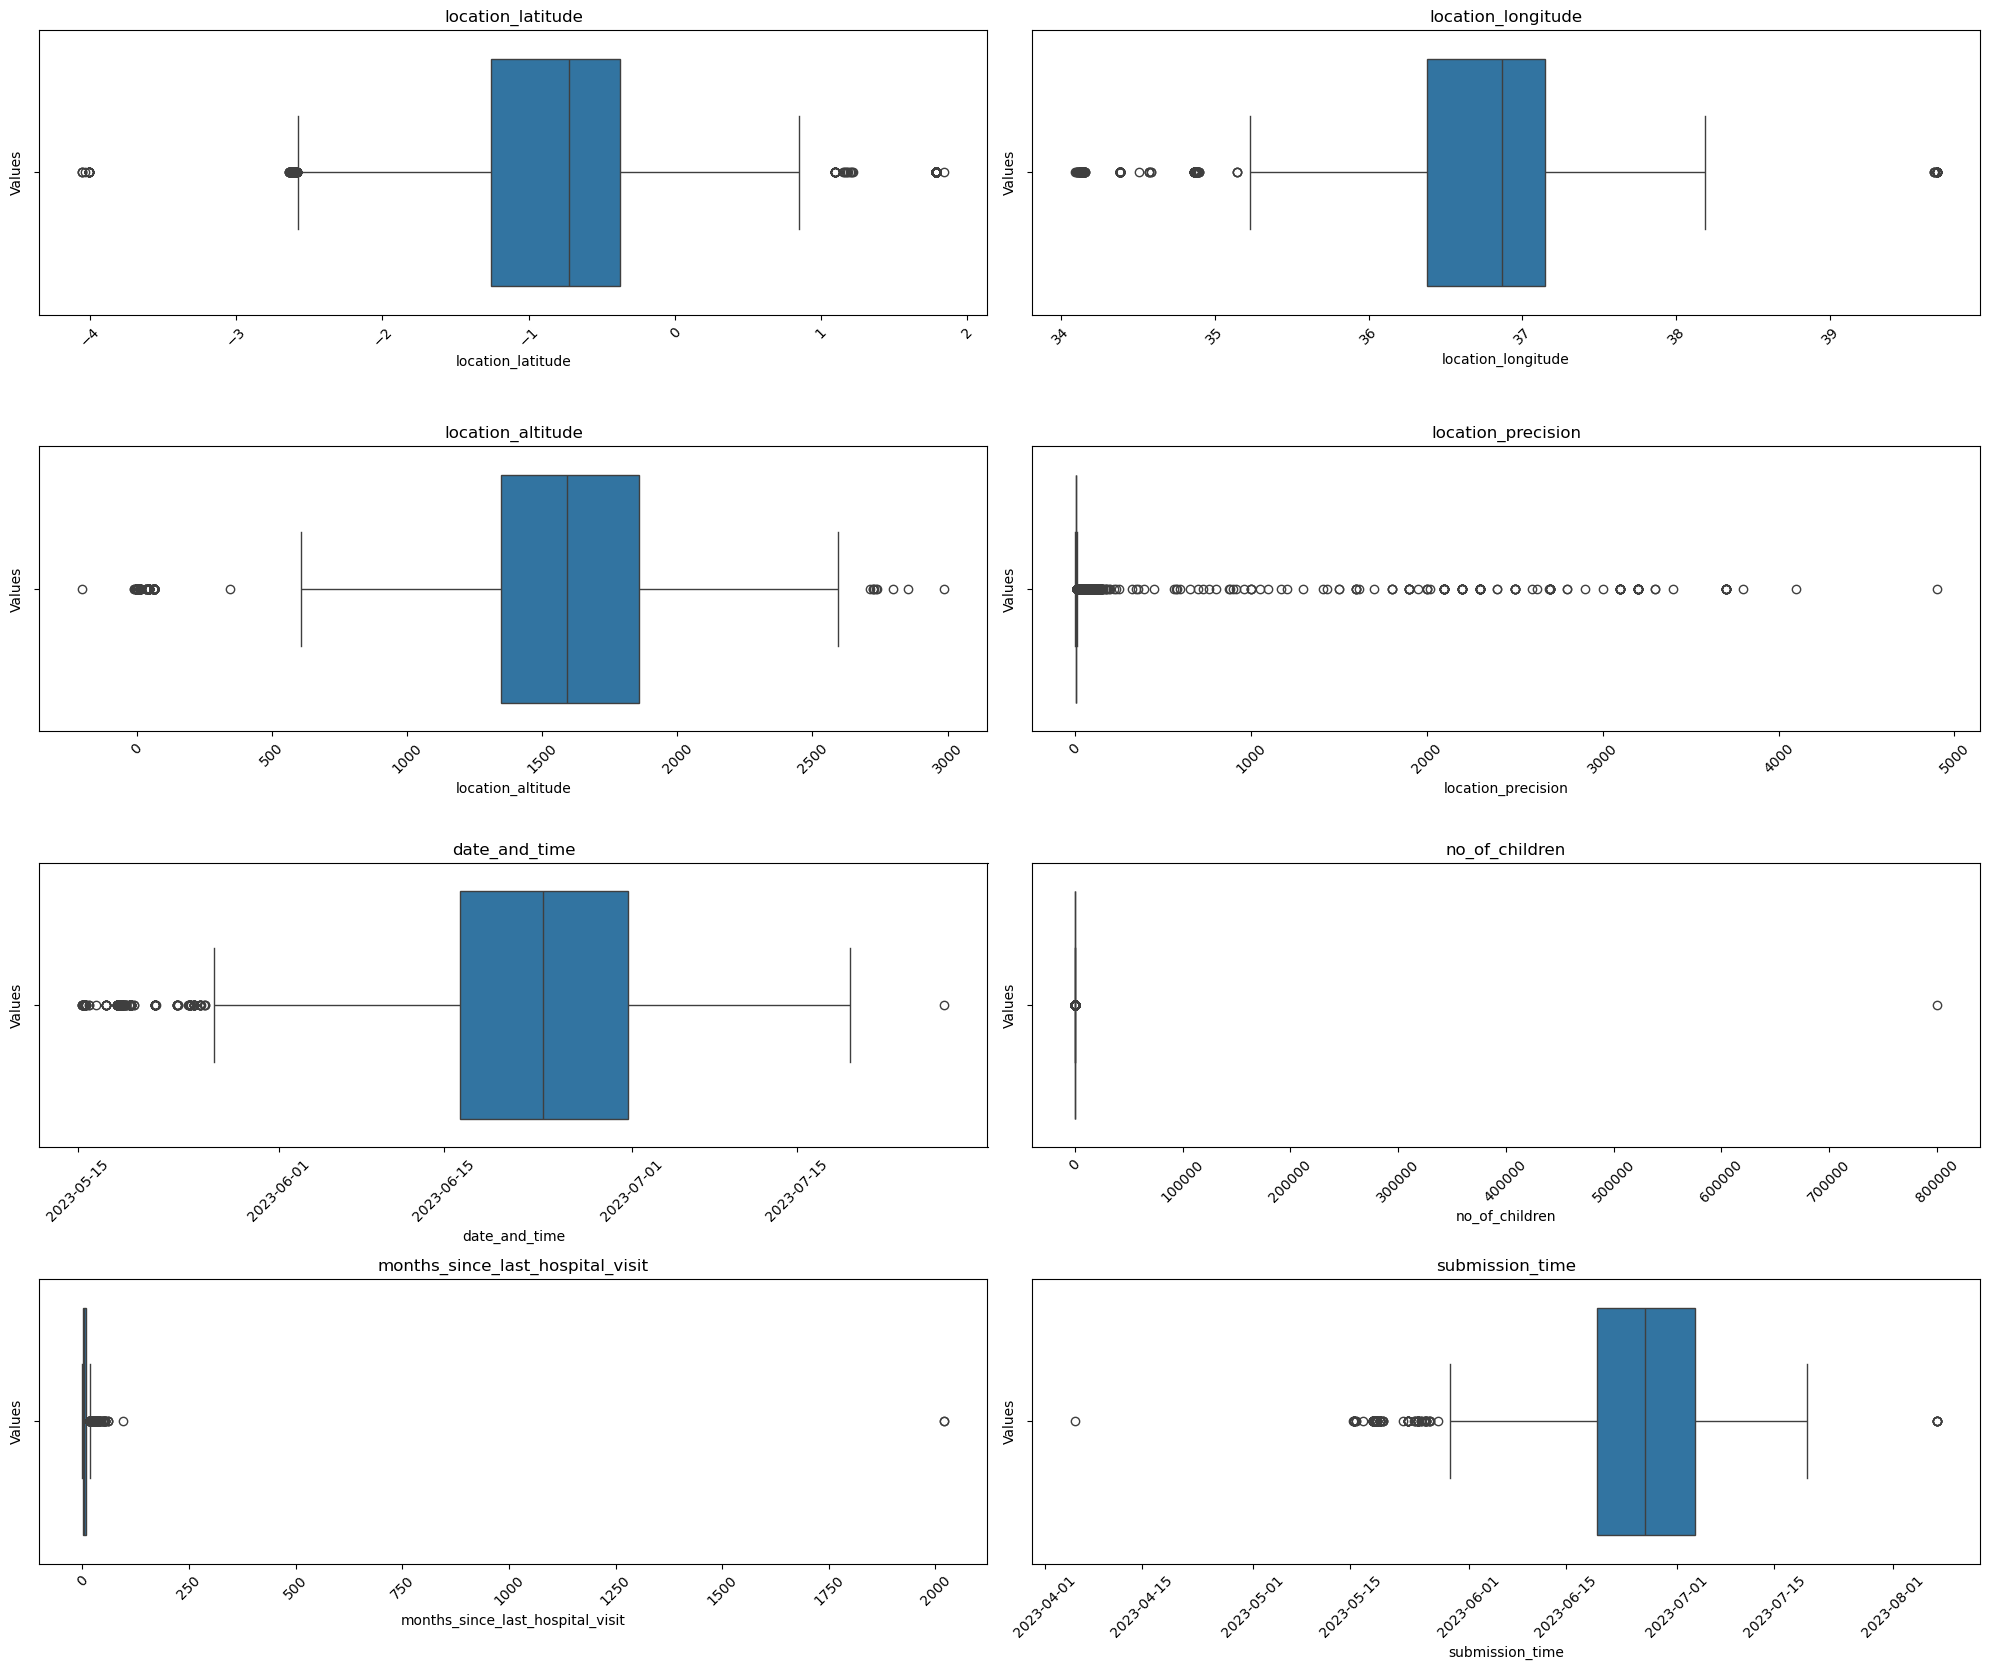

In [26]:
EDA_checks = EDA(df)
EDA_checks.check_outliers_and_plot()

***
**Handling Outliers in Number of Children Column**
***

In [28]:
# Getting the index of the rows to drop
idx=df[df["no_of_children"]>1000].index

# Dropping the 
df= df.drop(index=idx)

**Assumptions:**
***
- Any row with number of children above 1000 is dropped as this is an outlier that may skew the data


***
**Handling outliers in months since last hospital visit column**
***

In [30]:
# Creating function to handle outlier
def calc_month_difference(start_date, year_to_compare):
    """
    Function to calculate the difference between the date of record and the year to compare it to
    """
    start_datetime=start_date
    
    # Creating datetime object for the comparision i.e. Jan 1st
    compare_datetime = datetime(year_to_compare, 12, 1)
    
    # Calculate the difference in months
    month_difference = (start_datetime.year - compare_datetime.year) * 12 + (start_datetime.month - compare_datetime.month)
    
    return month_difference

In [31]:
df[df["months_since_last_hospital_visit"] == 2020]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,submission_time
_index,,,,,,,,,,,,,,,,,,,,,
160,-0.3341618 35.238713 0.0 2799.999,-0.334162,35.238713,0.0,2799.999,2023-05-24 08:10:00,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NOT_INSURED,2020.0,No,No,Not_Applicable,Yes,4+,2023-05-24 05:12:35


In [32]:
# filtering for the date of the outlier
filtered_date = df.loc[df["months_since_last_hospital_visit"] == 2020, "date_and_time"].iloc[0]
print(f"Date of the record: {filtered_date}")

# Year to compare it to
year_to_compare = 2020

# Calculating the difference
months_difference = calc_month_difference(filtered_date, year_to_compare)
print(f"The difference in months is: {filtered_date} {months_difference}")

# Replacing teh outlier with the value generated
df.loc[df['months_since_last_hospital_visit']==2020, 'months_since_last_hospital_visit']=months_difference



Date of the record: 2023-05-24 08:10:00
The difference in months is: 2023-05-24 08:10:00 29


In [33]:
# filtering for the date of outlier
filtered_date = df.loc[df["months_since_last_hospital_visit"] == 2021, "date_and_time"].iloc[0]
print(f"Date of the record: {filtered_date}")

# year to compare it to
year_to_compare = 2021

# Calculating the difference
months_difference = calc_month_difference(filtered_date, year_to_compare)
print(f"The difference in months is: {filtered_date} {months_difference}")

#Replacing the outlier with the value generated
df.loc[df['months_since_last_hospital_visit']==2021, 'months_since_last_hospital_visit']=months_difference


Date of the record: 2023-06-29 17:44:00
The difference in months is: 2023-06-29 17:44:00 18


**Assumptions:**
***
- We assume that the comparison is made from December of the year. This reduces the months but produces minimal bias while ensuring we do not lose information

***
#### 3.2.4 COMPLETENESS CHECK
***
- Dropping Missing values
- Filling Missing Values
**
Due to the large number of missing values in each column we shall handle them one at a time

In [36]:
#Percentage Of missing values in the dataframe
pd.DataFrame((df.isna().mean() * 100).round(2), columns=["% of Null Values"])

,% of Null Values
location,5.72
location_latitude,5.72
location_longitude,5.72
location_altitude,5.72
location_precision,5.72
date_and_time,2.39
age,0.29
gender,0.28
marital_status,0.29
no_of_children,10.15


***
**3.2.4.1. HANDLING MISSING VALUES IN GENDER COLUMN**
***

In [38]:
# Finding the percentage of missing values in Gender Column
print(f"Percentage of missing values in Gender column {(df.gender.isna().mean()*100).round(2)}%")


Percentage of missing values in Gender column 0.28%


In [39]:
# dropping null values in Gender column
df.dropna(subset=["gender"],inplace= True)

# Check if all missing values are filled
print(f"Remaining missing values in Gender: {df['gender'].isna().sum()}")


Remaining missing values in Gender: 0


**Assumptions:**
***
- Percentage of Missing values in Gender Column is only 0.28% of the whole dataset hence dropping the columns was decided upon

***
**3.2.4.2. HANDLING MISSING VALUES IN AGE COLUMN**
***

In [42]:
# Finding the percentage of missing values in Age Column
print(f"Percentage of missing values in Age  column {(df.age.isna().mean()*100).round(2)}%")

Percentage of missing values in Age  column 0.18%


In [43]:
df.groupby(['gender','marital_status','no_of_children', 'employment_status','age'])['age'].count()

gender  marital_status  no_of_children  employment_status  age  
Female  Divorced        0.0             Self-employed      41-50      1
                                        Unemployed         18-30      1
                        1.0             Employed           18-30      2
                                                           31-40      6
                                                           41-50      4
                                                           51-60      1
                                                           60+        1
                                        Self-employed      18-30      4
                                                           31-40      8
                                                           41-50      4
                                                           51-60      1
                                                           60+        2
                                        Unemployed         18-30      8

In [44]:

# Define a function to compute the mode 
def calc_mode(series):
    return series.mode()[0] 

# Group by relevant columns and calculate the mode for Age
grouped_mode = (
    df.groupby(['gender','marital_status','no_of_children', 'employment_status'])['age']
    .transform(calc_mode)
)

# Fill missing values in Age with the grouped mode
df['age'] = df['age'].fillna(grouped_mode)

# Check if all missing values are filled
print(f"Remaining missing values in Age: {df['age'].isna().sum()}")


Remaining missing values in Age: 0


**Assumptions:**
***
- Values seem to be missing completely at random
- Mode is used as the column is categorical
- The code assumes that the mode within each group defined by 'gender', 'marital_status', 'no_of_children', and 'employment_status' is a representative value for the missing ages


***
**3.4.3. HANDLING MISSING VALUES IN MARITAL STATUS COLUMN**
***

In [47]:
# Finding the percentage of missing values in Marital Status Column
print(f"Percentage of missing values in Marital Status column {(df.marital_status.isna().mean()*100).round(2)}%")

Percentage of missing values in Marital Status column 0.2%


In [48]:
# Filling the marital status null values with undisclosed
df["marital_status"]=df["marital_status"].fillna("Undisclosed")

# Check if all missing values are filled
print(f"Remaining missing values in Marital Status: {df['marital_status'].isna().sum()}")



Remaining missing values in Marital Status: 0


**Assumptions:**
***
- Values seem to be missing completely at random
- Imputing the missing values which are 0.2% of the dataset does not greatly bias the data

***
**3.4.4. HANDLING MISSING VALUES IN EMPLOYMENT STATUS COLUMN**
***

In [51]:
# Finding the percentage of missing values in Employment Status Column
print(f"Percentage of missing values in Employment Status column {(df.employment_status.isna().mean()*100).round(2)}%")

Percentage of missing values in Employment Status column 0.31%


In [52]:
# Filling the employment  status null values with undisclosed
df["employment_status"]=df["employment_status"].fillna("Undisclosed")

# Check if all missing values are filled
print(f"Remaining missing values in Employment Status: {df['employment_status'].isna().sum()}")

Remaining missing values in Employment Status: 0


**Assumptions:**
***
- Values seem to be missing completely at random
- Imputing the missing values which are 0.3% of the dataset does not greatly bias the data

***
**3.4.5. HANDLING MISSING VALUES IN NUMBER OF CHILDREN COLUMN**
***

In [55]:
# Finding the percentage of missing values in Number of Children Status Column
print(f"Percentage of missing values in Number of Children column {(df.no_of_children.isna().mean()*100).round(2)}%")

Percentage of missing values in Number of Children column 10.07%


In [56]:
df.no_of_children.value_counts(normalize=True)

no_of_children
2.0     0.245201
3.0     0.185983
0.0     0.171315
1.0     0.154292
4.0     0.082760
5.0     0.076059
6.0     0.039660
8.0     0.017928
7.0     0.013401
9.0     0.007063
10.0    0.001992
11.0    0.001268
12.0    0.001087
15.0    0.000362
16.0    0.000181
36.0    0.000181
52.0    0.000181
22.0    0.000181
14.0    0.000181
24.0    0.000181
19.0    0.000181
13.0    0.000181
68.0    0.000181
Name: proportion, dtype: float64

In [57]:

def calc_mode(series):
    mode = series.mode()
    return mode[0] 
    
grouped_value=(df.groupby(["gender","age","marital_status",])["no_of_children"].transform(calc_mode))
df.no_of_children=df.no_of_children.fillna(grouped_value)
print(f"Remaining missing values in Number of Children: {df['no_of_children'].isna().sum()}")

Remaining missing values in Number of Children: 0


In [58]:
df.no_of_children.value_counts(normalize=True)

no_of_children
0.0     0.238599
2.0     0.231922
3.0     0.168404
1.0     0.141694
4.0     0.074430
5.0     0.068893
6.0     0.035831
8.0     0.016124
7.0     0.012052
9.0     0.006352
10.0    0.001792
11.0    0.001140
12.0    0.000977
15.0    0.000326
16.0    0.000163
36.0    0.000163
52.0    0.000163
22.0    0.000163
14.0    0.000163
24.0    0.000163
19.0    0.000163
13.0    0.000163
68.0    0.000163
Name: proportion, dtype: float64

In [59]:
# Setting the bins
bins=[0,1,2,3,4,5,6,7,8,9,100 ]

# Setting the labels
labels=["0","1","2","3","4","5","6","7","8","9+"]

# Cutting the columns into bins
df["no_of_children"]=pd.cut(df["no_of_children"],bins=bins, labels=labels, right=False)

# Replacing null values with unknown
# df["no_of_children"] = df["no_of_children"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in Number of Children: {df['no_of_children'].isna().sum()}")


Remaining missing values in Number of Children: 0


In [60]:
df.no_of_children.value_counts()

no_of_children
0     1465
2     1424
3     1034
1      870
4      457
5      423
6      220
8       99
7       74
9+      74
Name: count, dtype: int64

**Assumptions:**
***
- Assumpution is the values are not missing at random, heirachial imputation was carried out using the age, gender and marital status to fill in the missing values

***
**3.4.6. HANDLING MISSING VALUES IN MONTHLY HOUSEHOLD INCOME COLUMN**
***

In [63]:
# Finding the percentage of missing values in Monthly Household Income Column
print(f"Percentage of missing values in Monthly Household Income column {(df.monthly_household_income.isna().mean()*100).round(2)}%")

Percentage of missing values in Monthly Household Income column 4.14%


In [64]:
# Fill NaN values with 'Less than 10000' for rows where 'employment_status' is 'Unemployed'
df.loc[df["monthly_household_income"].isna() & (df["employment_status"] == "Unemployed") & (df["marital_status"]=="Single"), "monthly_household_income"] = "Less than 10000"

# Filling the Monthly Household Income null values with undisclosed
df["monthly_household_income"]=df["monthly_household_income"].fillna("Undisclosed")

print(f"Remaining missing values in Monthly Household Income: {df['monthly_household_income'].isna().sum()}")



Remaining missing values in Monthly Household Income: 0


**Assumptions:**
***
- Assuming some values are missing not at random, we assume that someone who is unemployed and single will have an income of less than 10000
- Remaining missing values are undisclosed

***
**3.4.7. HANDLING MISSING VALUES IN HAD HEALTH INSURANCE? COLUMN**
***

In [67]:
# Finding the percentage of missing values in Had Health Insurance  Column
print(f"Percentage of missing values in Had Health Insurance column {(df['had_health_insurance?'].isna().mean()*100).round(2)}%")

Percentage of missing values in Had Health Insurance column 0.23%


In [68]:
#
df.loc[(df['had_health_insurance?'].isna() & (df['insurer'].notnull()), 'had_health_insurance?')] = "Yes"

#
df['had_health_insurance?']=df['had_health_insurance?'].fillna("Undisclosed")

print(f"Remaining missing values in Had Health Insurance column: {df['had_health_insurance?'].isna().sum()}")
 

Remaining missing values in Had Health Insurance column: 0


**Assumptions:**
***
- Assuming some values are missing not at random, we assume that if there is a missing value in the had health insurance column yet the insurer name has been filled, then the missing value should actually be Yes
- Remaining missing values are undisclosed

***
**3.4.8. HANDLING MISSING VALUES IN INSURER COLUMN**
***

In [71]:
# Finding the percentage of missing values in Insurer Column
print(f"Percentage of missing values in Insurer column {(df['insurer'].isna().mean()*100).round(2)}%")

Percentage of missing values in Insurer column 0.73%


In [72]:
#
df.insurer=df.insurer.fillna("UNDISCLOSED")

print(f"Remaining missing values in Insurer column: {df['insurer'].isna().sum()}")

Remaining missing values in Insurer column: 0



**Assumptions:**
***
- Assuming values are missing completely at random, the missing values were filled in with undisclosed

***
**3.4.8. HANDLING MISSING VALUES IN MONTHS SINCE LAST VISIT COLUMN**
***

In [75]:
# Finding the percentage of missing values in Insurer Column
print(f"Percentage of missing values in Months since last hospital visit column {(df['months_since_last_hospital_visit'].isna().mean()*100).round(2)}%")

Percentage of missing values in Months since last hospital visit column 2.51%


In [76]:
# Creating column with years since last visit instead of months
df['years_since_last_hospital_visit'] = (df['months_since_last_hospital_visit'] / 12).round(2)

# Define the year bins and labels
bins = [0, 1, 2, 3, 4, 5, 10]
labels=["0-1 year","1-2 years","2-3 years","3-4 years","4-5 years","5+ years"]

# Bin the 'years_since_last_hospital_visit' data into these intervals
df['years_since_last_hospital_visit'] = pd.cut(df['years_since_last_hospital_visit'], bins=bins,labels=labels, right=False)

#Replacing null values with unknown
df["years_since_last_hospital_visit"] = df["years_since_last_hospital_visit"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in years since last hospital visit: {df['years_since_last_hospital_visit'].isna().sum()}")

df['years_since_last_hospital_visit'].value_counts()

Remaining missing values in years since last hospital visit: 0


years_since_last_hospital_visit
0-1 year     5201
1-2 years     618
unknown       154
2-3 years     116
3-4 years      34
4-5 years      13
5+ years        4
Name: count, dtype: int64

In [77]:
# Creating column with bi annual visit instead of months
df['six_month_intervals'] = (df['months_since_last_hospital_visit'] / 6).round(2)

bins = [ 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5,10, 2025]

# Define the labels for each bin
labels = ['0-0.5 years', '0.5-1 years', '1-1.5 years', '1.5-2 years', '2-2.5 years', 
          '2.5-3 years', '3-3.5 years', '3.5-4 years', '4-4.5 years', '4.5-5 years', 
          '5-5.5 years', '5.5-6 years', '6-6.5 years', '6.5-7 years', '7-7.5 years', 
          '7.5-8 years', '8-8.5 years', '8.5-9 years', '9-9.5 years', '9.5-10 years', '10+ years']

# Bin the 'years_since_last_hospital_visit' data into these intervals
df['six_month_intervals'] = pd.cut(df['six_month_intervals'], bins=bins, labels=labels, right=False)

# Replacing null values with unknown
df["six_month_intervals"] = df["six_month_intervals"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in 6 month interval: {df['six_month_intervals'].isna().sum()}")

df['months_since_last_hospital_visit']=df['months_since_last_hospital_visit'].fillna("Unknown")

df['six_month_intervals'].value_counts()

Remaining missing values in 6 month interval: 0


six_month_intervals
0.5-1 years     1941
0-0.5 years     1783
1-1.5 years     1056
1.5-2 years      421
2-2.5 years      348
unknown          154
2.5-3 years      124
3-3.5 years       97
4-4.5 years       87
3.5-4 years       49
6-6.5 years       27
4.5-5 years       13
5-5.5 years       10
8.5-9 years        7
8-8.5 years        6
5.5-6 years        6
7-7.5 years        4
10+ years          4
6.5-7 years        3
7.5-8 years        0
9-9.5 years        0
9.5-10 years       0
Name: count, dtype: int64


**Assumptions:**
***
- Assuming values are missing completely at random, the missing values were filled in with unknown
- Data has been split into annual and bi annual splits as this will provide better data interpretation

***
**3.4.9. HANDLING MISSING VALUES IN HAD INSURANCE DURING LAST HOSPITAL VISIT COLUMN**
***

In [80]:
# Finding the percentage of missing values in had insurance during last hospital visit column
print(f"Percentage of missing values in had insurance during last hospital visit column {(df['had_health_insurance_during_visit?'].isna().mean()*100).round(2)}%")

Percentage of missing values in had insurance during last hospital visit column 0.85%


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6140 entries, 1 to 6158
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5793 non-null   object        
 1   location_latitude                   5793 non-null   float64       
 2   location_longitude                  5793 non-null   float64       
 3   location_altitude                   5793 non-null   float64       
 4   location_precision                  5793 non-null   float64       
 5   date_and_time                       5998 non-null   datetime64[ns]
 6   age                                 6140 non-null   object        
 7   gender                              6140 non-null   object        
 8   marital_status                      6140 non-null   object        
 9   no_of_children                      6140 non-null   category      
 10  employment_status            

In [82]:
# Assumption
df.loc[df['had_health_insurance?']=="No", 'had_health_insurance_during_visit?']= "No"

df["had_health_insurance_during_visit?"]=df["had_health_insurance_during_visit?"].fillna("Undisclosed")

print(f"Remaining missing values in had insurance during last hospital visit column: {df['had_health_insurance_during_visit?'].isna().sum()}")

Remaining missing values in had insurance during last hospital visit column: 0


**Assumptions:**
***
- Assuming some values are missing not at random, we assume that if the person has never had health insurance then they also did not have insurance during their last hospital visit
- All other missing values are grouped as undisclosed

***
**3.4.10. HANDLING MISSING VALUES IN HAD ROUTINE CHECK UP WITH DOCTOR COLUMN**
***

In [85]:
# Finding the percentage of missing values in had routine checkup with doctor column
print(f"Percentage of missing values in had routine checkup with doctor column {(df['had_routine_checkup_with_doctor'].isna().mean()*100).round(2)}%")

Percentage of missing values in had routine checkup with doctor column 0.31%


In [86]:
#
df["had_routine_checkup_with_doctor"]= df["had_routine_checkup_with_doctor"].fillna("Undisclosed")

print(f"Remaining missing values in had routine checkup with doctor column: {df['had_routine_checkup_with_doctor'].isna().sum()}")

Remaining missing values in had routine checkup with doctor column: 0



**Assumptions:**
***
- Assuming values are missing completely at random, the missing values were filled in with undisclosed


***
**3.4.11 HANDLING MISSING VALUES IN YEARS SINCE LAST CHECKUP COLUMN**
***

In [89]:
# Finding the percentage of missing values in years since last cehckup column
print(f"Percentage of missing values in years since last cehckup column {(df['years_since_last_checkup'].isna().mean()*100).round(2)}%")

Percentage of missing values in years since last cehckup column 0.64%


In [90]:
# Filling in undisclosed for the missing values
df.years_since_last_checkup=df.years_since_last_checkup.fillna("Undisclosed")

print(f"Remaining missing values in years since last routine checkup column: {df['years_since_last_checkup'].isna().sum()}")

Remaining missing values in years since last routine checkup column: 0


**Assumptions:**
***
- Assuming values are missing completely at random, the missing values were filled in with undisclosed

***
**3.4.12 HANDLING MISSING VALUES IN HAD CANCER SCREENING COLUMN**
***

In [93]:
# Finding the percentage of missing values in have you ever had cancer screening column
print(f"Percentage of missing values in have you ever had cancer screening column: {(df['had_cancer_screening?'].isna().mean()*100).round(2)}%")

Percentage of missing values in have you ever had cancer screening column: 0.42%


In [94]:

df.loc[(df['had_cancer_screening?'].isna() & df['years_since_last_cancer_screening'].notnull()), 'had_cancer_screening?'] = "Yes"

df["had_cancer_screening?"]=df["had_cancer_screening?"].fillna("Undisclosed")

print(f"Remaining missing values in have you ever had cancer screening column: {df['had_cancer_screening?'].isna().sum()}")


Remaining missing values in have you ever had cancer screening column: 0


**Assumptions:**
***
- Assuming some values are missing not at random, we assume that if the ever had cancer screening column is null yet the years since last cancer screening has been indicated, it implies that the person has had cancer screening and it is filled in as Yes
- All other missing values are grouped as undisclosed

***
**3.4.12 HANDLING MISSING VALUES IN YEARS SINCE LAST CANCER SCREENING COLUMN**
***

In [97]:
# Finding the percentage of missing values in years since last cancer screening column
print(f"Percentage of missing values in years since last cancer screening column {(df['years_since_last_cancer_screening'].isna().mean()*100).round(2)}%")

Percentage of missing values in years since last cancer screening column 0.73%


In [98]:
df["years_since_last_cancer_screening"]=df["years_since_last_cancer_screening"].fillna("Undisclosed")

print(f"Remaining missing values in in years since last cancer screening column: {df['years_since_last_cancer_screening'].isna().sum()}")

Remaining missing values in in years since last cancer screening column: 0


**Assumptions:**
***
- Assuming values are missing completely at random, the missing values were filled in with undisclosed

***
### 3.3 FEATURE ENGINEERING
***

In [101]:
# list of insurances to map correctly
insurance_mapping={
    "CIC MEDICAL":"CIC","DIRECT LINE":"DIRECTLINE","APA AFYA NAFUU":"APA","AFYA":"APA",
    "MHIF":"NHIF","NHIT":"NHIF", "SAMLAM":"SANLAM","KENNEDIN":"KENINDIA","HIF":"NHIF",
    "BRIT":"BRITAM", "NHIF.":"NHIF", "THE NATIONAL HOSPITAL  FUND (NHIF)":"NHIF", "APA .":"APA", 
    "KENNIDA":"KENINDIA", "N":"NHIF", "JUBILEE S":"JUBILEE", "ARA":"AAR", "NGIF":"NHIF",
    "NSSF":"NHIF", "OLD MUTUAL.":"OLD MUTUAL", "MARTENITY":"NHIF", "MATERNITY":"NHIF", "LINDA MAMA":"NHIF", 
    "NHIF,NSSF":"NHIF","NHIF, NSSF":"NHIF",", NHIF":"NHIF","AON NHIF":"AON,NHIF",
    "NHIF AND BRITAM":"NHIF, BRITAM","KENNEDIN":"KENINDIA","JUBILEE INSURANCES":"JUBILEE",
    "NHIF EQUITY":"NHIF,EQUITY","UAP OLD MUTUAL":"UAP,OLD MUTUAL","OLD MUTUAL, \nNHIF\nJUBILEE":"OLD MUTUAL,NHIF\nJUBILEE",
    "NSSF, APA INSURANCE, NHIF":"APA INSURANCE, NHIF","LINDA MAMA , NHIF":"NHIF","AON":"AON MINET","MINET":"AON","":"","":"",
}

# Performing mapping on the insurer column
df.insurer= df.insurer.replace(insurance_mapping)


In [102]:
# Function to prioritize NHIF to the first position in the list
def prioritize_nhif(lst):    
    lst = [item.strip() for item in lst]
    if 'NHIF' in lst:
        lst.remove('NHIF')
        lst.insert(0, 'NHIF')   
    return lst

# Split the 'insurer' column into a list of insurers and create a new column splits_insurer
df['splits_insurer'] = df['insurer'].str.split(r'[\n,]+')

# Apply the prioritize_nhif function to each list in the splits_insurer column
df['splits_insurer'] = df['splits_insurer'].apply(prioritize_nhif)

# Now split the splits_insurer column again to separate them into individual columns
df_split = df['splits_insurer'].apply(pd.Series)

# Rename columns for clarity
df_split.columns = ['insurer_1', 'insurer_2', 'insurer_3']

# Extra words to remove from the column
words_to_remove=["INSURANCE", "BANK", "CARE","COMPANY", "PLC", "COVER", "GROUP","LIMITED","LTD","KENYA","OF","HOLDINGS"]


joined="|".join(words_to_remove)

# Removing the extra words and performing mapping on the words that are left
df_split["insurer_1"]=df_split["insurer_1"].str.replace(joined,"",regex=True).str.strip().replace(insurance_mapping)
df_split["insurer_2"]=df_split["insurer_2"].str.replace(joined,"",regex=True).str.strip().replace(insurance_mapping)
df_split["insurer_3"]=df_split["insurer_3"].str.replace(joined,"",regex=True).str.strip().replace(insurance_mapping)

# Combining all entries with less than 2 value counts to others
df_split["insurer_1"]= df_split["insurer_1"].apply(lambda x: x if df_split.insurer_1.value_counts()[x] >=2 else "OTHERS")

# Filling all the null values with NOT APPLICABLE
df_split.loc[df_split.insurer_2.isna(), "insurer_2"]="NOT APPLICABLE"
df_split.loc[df_split.insurer_3.isna(), "insurer_3"]="NOT APPLICABLE"


# # Merge the split columns back with the original DataFrame
df = pd.concat([df, df_split], axis=1)

In [103]:
df.insurer_1.value_counts()

insurer_1
NHIF           2863
NOT_INSURED    2528
JUBILEE         129
BRITAM          104
APA             100
MAKUENI          84
MADISON          54
CIC              52
UNDISCLOSED      45
OTHERS           30
AON MINET        26
AAR              26
DIRECTLINE       17
HEALTH           13
UON               9
COOPERATIVE       9
PERSONAL          8
UAP               6
LIFE              6
SANLAM            4
ABSA              3
EQUITY AFIA       3
SIDIAN            3
OLD MUTUAL        3
KENINDIA          3
M TIBA            3
CITAM             3
NPS               2
KCB               2
INPATIENT         2
Name: count, dtype: int64

In [104]:
df.insurer_2.value_counts()


insurer_2
NOT APPLICABLE    6067
BRITAM              21
JUBILEE             17
APA                 11
AON MINET            8
OLD MUTUAL           4
EQUITY AFIA          3
MADISON              2
CIC                  2
ATTACHED             1
FIRST                1
TSC                  1
ATTACHMENT           1
EQUITY               1
Name: count, dtype: int64

In [105]:
df.insurer_3.value_counts()


insurer_3
NOT APPLICABLE    6135
JUBILEE              3
OLD MUTUAL           1
BRITAM               1
Name: count, dtype: int64

In [106]:
df.isna().sum()

location                              347
location_latitude                     347
location_longitude                    347
location_altitude                     347
location_precision                    347
date_and_time                         142
age                                     0
gender                                  0
marital_status                          0
no_of_children                          0
employment_status                       0
monthly_household_income                0
had_health_insurance?                   0
insurer                                 0
months_since_last_hospital_visit        0
had_health_insurance_during_visit?      0
had_routine_checkup_with_doctor         0
years_since_last_checkup                0
had_cancer_screening?                   0
years_since_last_cancer_screening       0
submission_time                         0
years_since_last_hospital_visit         0
six_month_intervals                     0
splits_insurer                    

In [107]:
# List of columns to drop
columns_to_drop=["insurer","splits_insurer","months_since_last_hospital_visit","submission_time","date_and_time"]

# Dropping these columns
df.drop(columns=columns_to_drop, axis=1, inplace= True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6140 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   location                            5793 non-null   object  
 1   location_latitude                   5793 non-null   float64 
 2   location_longitude                  5793 non-null   float64 
 3   location_altitude                   5793 non-null   float64 
 4   location_precision                  5793 non-null   float64 
 5   age                                 6140 non-null   object  
 6   gender                              6140 non-null   object  
 7   marital_status                      6140 non-null   object  
 8   no_of_children                      6140 non-null   category
 9   employment_status                   6140 non-null   object  
 10  monthly_household_income            6140 non-null   object  
 11  had_health_insurance?              

In [109]:
# saving the cleaned_data to an excel sheet
df.to_excel("cleaned_data.xlsx") 